In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [3]:
df = DataFrame()
df['colors'] = ['Red', 'Blue', 'Brown', 'Red', 'Brown', 'Black', 'Green', 'Black and White', 'Brown', 'Multi-color', 'Yellow', 'Pink', 'Gray', 'White', 'Black']
df['wingspan'] = [20, 25, 15, 18, 200, 180,10, 45, 30, 40, 12, 150,180, 150, 40]
df['lifespan'] = [5, 7, 3, 6, 20, 15,3, 15, 10, 15, 8, 25,20, 25, 8]
#df['habitat'] = ['Forest', 'Forest', 'Other', 'Forest', 'Mountain', 'Mountain', 'Other', 'Other', 'Forest', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other']
df

,colors,wingspan,lifespan
0,Red,20,5
1,Blue,25,7
2,Brown,15,3
3,Red,18,6
4,Brown,200,20
5,Black,180,15
6,Green,10,3
7,Black and White,45,15
8,Brown,30,10
9,Multi-color,40,15


In [4]:
dfX = df.drop(columns = ['colors'])
sy = df.colors

In [5]:
from sklearn.model_selection import train_test_split
dfX_train, dfX_test, sy_train, sy_test = train_test_split(dfX, sy, test_size=0.2, random_state=42)

In [43]:
dfX_train, dfX_test, sy_train, sy_test;

In [44]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le

LabelEncoder()

In [45]:
le = le.fit(sy_train)
le.classes_

array(['Forest', 'Mountain', 'Other'], dtype=object)

In [46]:
y_train = le.transform(sy_train)
sy_train, y_train

(13       Other
 5     Mountain
 8       Forest
 2        Other
 1       Forest
 14       Other
 4     Mountain
 7        Other
 10       Other
 12       Other
 3       Forest
 6        Other
 Name: habitat, dtype: object,
 array([2, 1, 0, 2, 0, 2, 1, 2, 2, 2, 0, 2]))

In [47]:
dfX_train.to_numpy()

array([[150,  25],
       [180,  15],
       [ 30,  10],
       [ 15,   3],
       [ 25,   7],
       [ 40,   8],
       [200,  20],
       [ 45,  15],
       [ 12,   8],
       [180,  20],
       [ 18,   6],
       [ 10,   3]])

In [48]:
n1 = preprocessing.MinMaxScaler()
n1 = n1.fit(dfX_train.to_numpy())
X_train = n1.transform(dfX_train.to_numpy())
X_train

array([[0.73684211, 1.        ],
       [0.89473684, 0.54545455],
       [0.10526316, 0.31818182],
       [0.02631579, 0.        ],
       [0.07894737, 0.18181818],
       [0.15789474, 0.22727273],
       [1.        , 0.77272727],
       [0.18421053, 0.54545455],
       [0.01052632, 0.22727273],
       [0.89473684, 0.77272727],
       [0.04210526, 0.13636364],
       [0.        , 0.        ]])

In [49]:
X_train.shape

(12, 2)

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn = knn.fit(X_train, y_train)
knn

KNeighborsClassifier(n_neighbors=1)

In [51]:
y_test = le.transform(sy_test.to_numpy())
sy_test, y_test

(9      Other
 11     Other
 0     Forest
 Name: habitat, dtype: object,
 array([2, 2, 0]))

In [52]:
X_test = n1.transform(dfX_test.to_numpy())
dfX_test, X_test

(    wingspan  lifespan
 9         40        15
 11       150        25
 0         20         5,
 array([[0.15789474, 0.54545455],
        [0.73684211, 1.        ],
        [0.05263158, 0.09090909]]))

In [53]:
knn.predict(X_test)

array([2, 2, 0])

In [54]:
y_test

array([2, 2, 0])

In [55]:
knn.score(X_test, y_test)

1.0

In [56]:
knn.score(X_train, y_train)

1.0

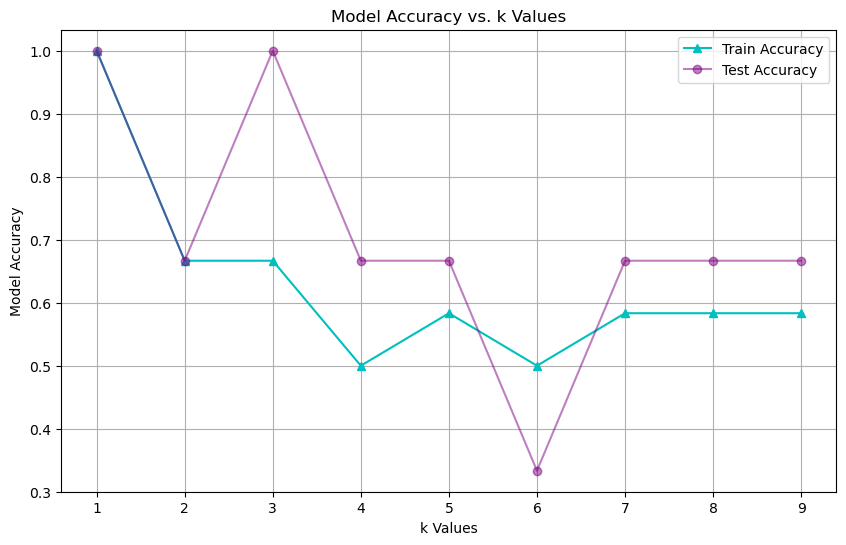

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9]

train_accuracies = []
test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, sy_train)

    # Predictions on the training set
    ytrain_prediction = knn.predict(X_train)
    train_accuracy = accuracy_score(sy_train, ytrain_prediction)
    train_accuracies.append(train_accuracy)

    # Predictions on the test set
    ytest_prediction = knn.predict(X_test)
    test_accuracy = accuracy_score(sy_test, ytest_prediction)
    test_accuracies.append(test_accuracy)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label='Train Accuracy', marker='^', color = 'c')
plt.plot(k_values, test_accuracies, alpha = 0.5, label='Test Accuracy', marker='o', color = 'purple')
plt.title('Model Accuracy vs. k Values')
plt.xlabel('k Values')
plt.ylabel('Model Accuracy')
plt.legend()
plt.grid(True)
plt.show()